#  Stock Price Prediction


**Objective:** Use historical stock data to predict the next day's closing price.

**Dataset:** Stock market data from Yahoo Finance (using yfinance library)

**Models:** Linear Regression & Random Forest Regressor

---

## 1. Import Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Styling
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 2. Load Stock Data

### Method 1: Using yfinance (Recommended)

First, install yfinance if you haven't already:
```bash
pip install yfinance
```

Then uncomment and run the following code to fetch real stock data:

In [7]:
pip install yfinance

In [14]:
import yfinance as yf

# Select a stock ticker (e.g., AAPL, TSLA, GOOGL, MSFT)
ticker = "AAPL"  # Apple Inc.
start_date = "2022-01-01"
end_date = "2024-12-31"

# Download historical data
print(f"Downloading {ticker} stock data from {start_date} to {end_date}...")
df = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Flatten MultiIndex columns for easier access
df.columns = [col[0] for col in df.columns]

print(f"✅ Downloaded {len(df)} records")
print(f"\nData range: {df.index[0]} to {df.index[-1]}")

✅ Downloaded 752 records

Data range: 2022-01-03 00:00:00 to 2024-12-30 00:00:00


## 3. Data Exploration and Inspection

In [6]:
# Display basic information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nDataset Shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nColumn Names: {list(df.columns)}")

DATASET OVERVIEW

Dataset Shape: (752, 5)
Number of records: 752
Number of features: 5

Column Names: [('Close', 'AAPL'), ('High', 'AAPL'), ('Low', 'AAPL'), ('Open', 'AAPL'), ('Volume', 'AAPL')]


In [8]:
# Display first few rows
print("\n" + "="*60)
print("FIRST 5 ROWS")
print("="*60)
df.head()


FIRST 5 ROWS


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2022-01-03,178.103668,178.955006,173.895967,174.013387,104487900
2022-01-04,175.843231,179.013699,175.275678,178.710355,99310400
2022-01-05,171.165848,176.303172,170.891858,175.755193,94537600
2022-01-06,168.308517,171.537695,167.956243,168.993491,96904000
2022-01-07,168.474823,170.402543,167.359291,169.179371,86709100


In [9]:
# Display last few rows
print("\n" + "="*60)
print("LAST 5 ROWS")
print("="*60)
df.tail()


LAST 5 ROWS


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-23,253.883118,254.261043,252.072998,253.385834,40858800
2024-12-24,256.797241,256.807166,253.903032,254.101958,23234700
2024-12-26,257.612732,258.686881,256.230300,256.787255,27237100
2024-12-27,254.201355,257.294474,251.685102,256.429175,42355300
2024-12-30,250.829773,252.122713,249.387654,250.859609,35557500


In [10]:
# Data types and missing values
print("\n" + "="*60)
print("DATA TYPES AND MISSING VALUES")
print("="*60)
df.info()


DATA TYPES AND MISSING VALUES
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 752 entries, 2022-01-03 to 2024-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   752 non-null    float64
 1   (High, AAPL)    752 non-null    float64
 2   (Low, AAPL)     752 non-null    float64
 3   (Open, AAPL)    752 non-null    float64
 4   (Volume, AAPL)  752 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.2 KB


In [11]:
# Statistical summary
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df.describe()


STATISTICAL SUMMARY


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,752.000000,752.000000,752.000000,752.000000,7.520000e+02
mean,175.930896,177.602215,174.054118,175.737404,6.811545e+07
std,29.379632,29.301145,29.325773,29.304617,2.834590e+07
min,123.046814,125.753411,122.210219,124.021187,2.323470e+07
25%,153.364727,155.061763,151.123525,152.832386,4.877432e+07
50%,171.176903,172.192433,169.397021,170.829569,6.224455e+07
75%,189.577991,190.982793,188.283317,189.460073,8.059140e+07
max,257.612732,258.686881,256.230300,256.787255,3.186799e+08


In [12]:
# Check for missing values
missing_values = df.isnull().sum()
print("\n" + "="*60)
print("MISSING VALUES")
print("="*60)
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ No missing values found!")
else:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")


MISSING VALUES
Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

✅ No missing values found!


## 4. Data Visualization

Let's visualize the stock data to understand trends and patterns.

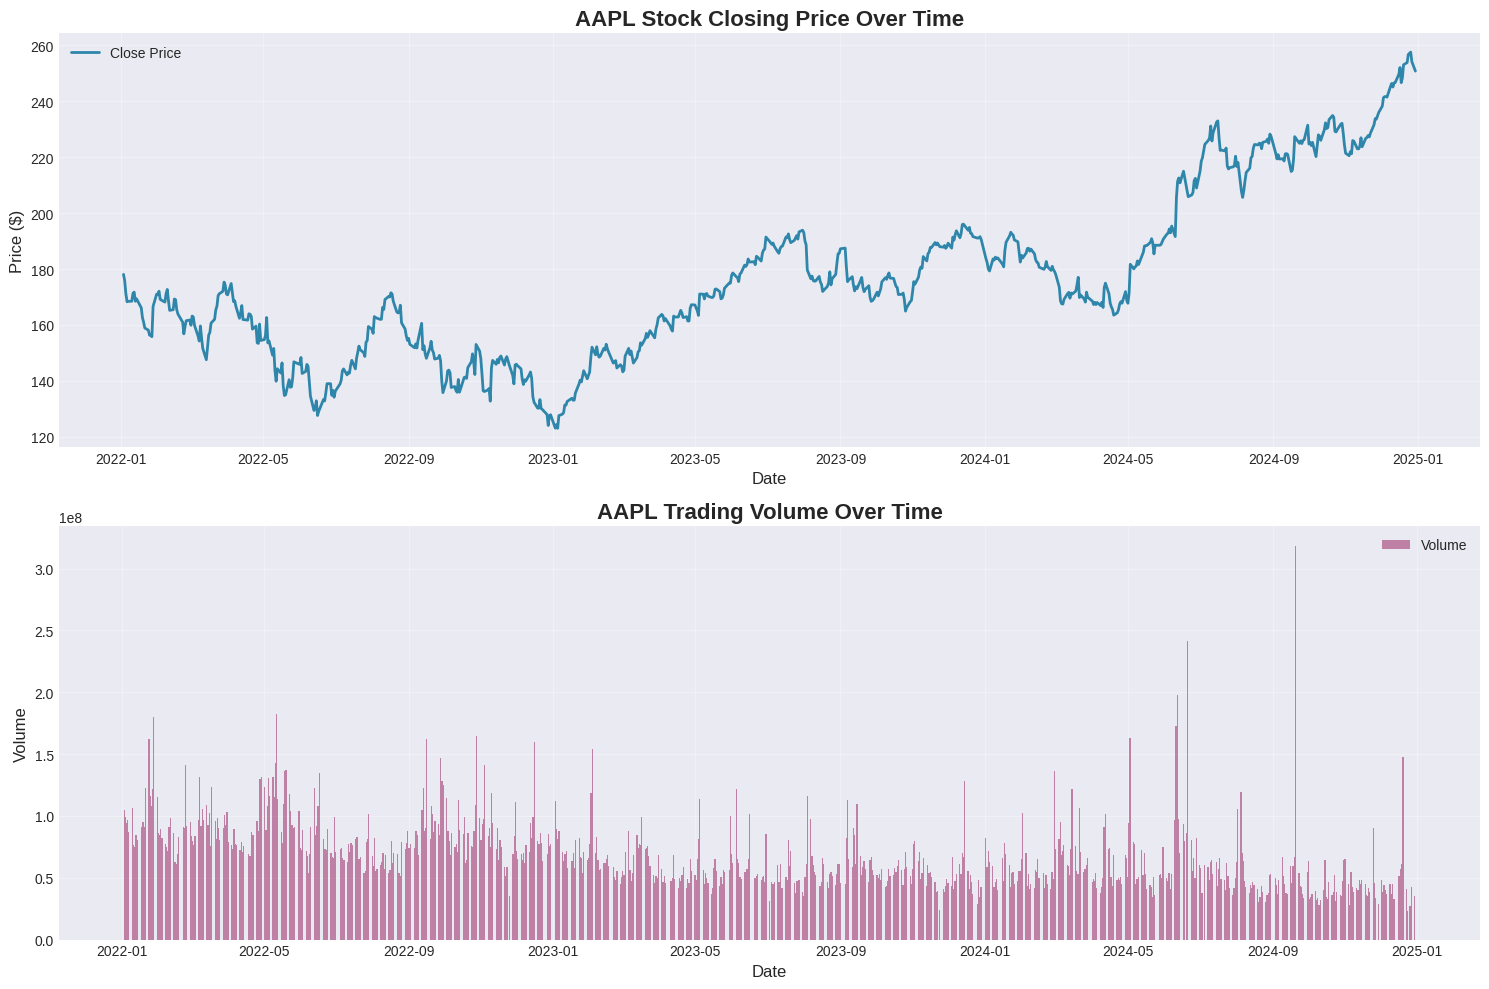

In [15]:
# Plot 1: Stock Price Over Time
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Closing price over time
axes[0].plot(df.index, df['Close'], linewidth=2, color='#2E86AB', label='Close Price')
axes[0].set_title(f'{ticker} Stock Closing Price Over Time', fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Volume over time
axes[1].bar(df.index, df['Volume'], width=1, color='#A23B72', alpha=0.6, label='Volume')
axes[1].set_title(f'{ticker} Trading Volume Over Time', fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Volume', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

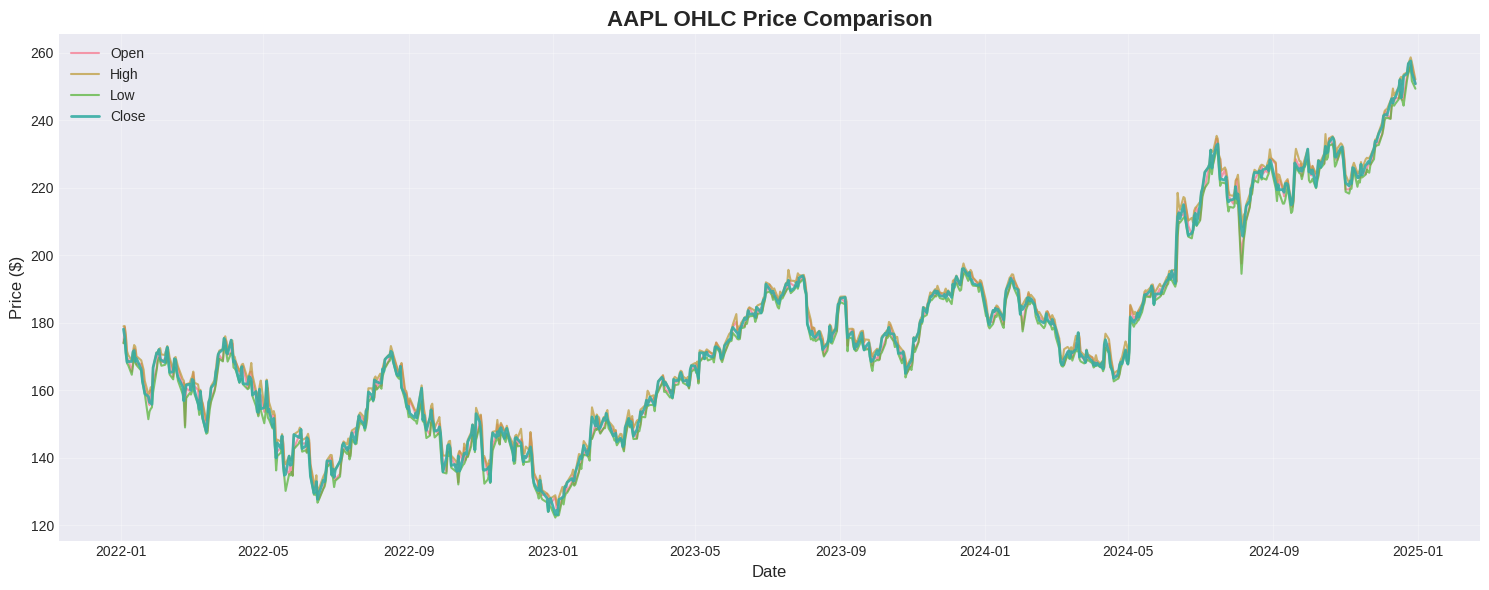

In [16]:
# Plot 2: OHLC Comparison
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df.index, df['Open'], label='Open', alpha=0.7, linewidth=1.5)
ax.plot(df.index, df['High'], label='High', alpha=0.7, linewidth=1.5)
ax.plot(df.index, df['Low'], label='Low', alpha=0.7, linewidth=1.5)
ax.plot(df.index, df['Close'], label='Close', alpha=0.9, linewidth=2)

ax.set_title(f'{ticker} OHLC Price Comparison', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

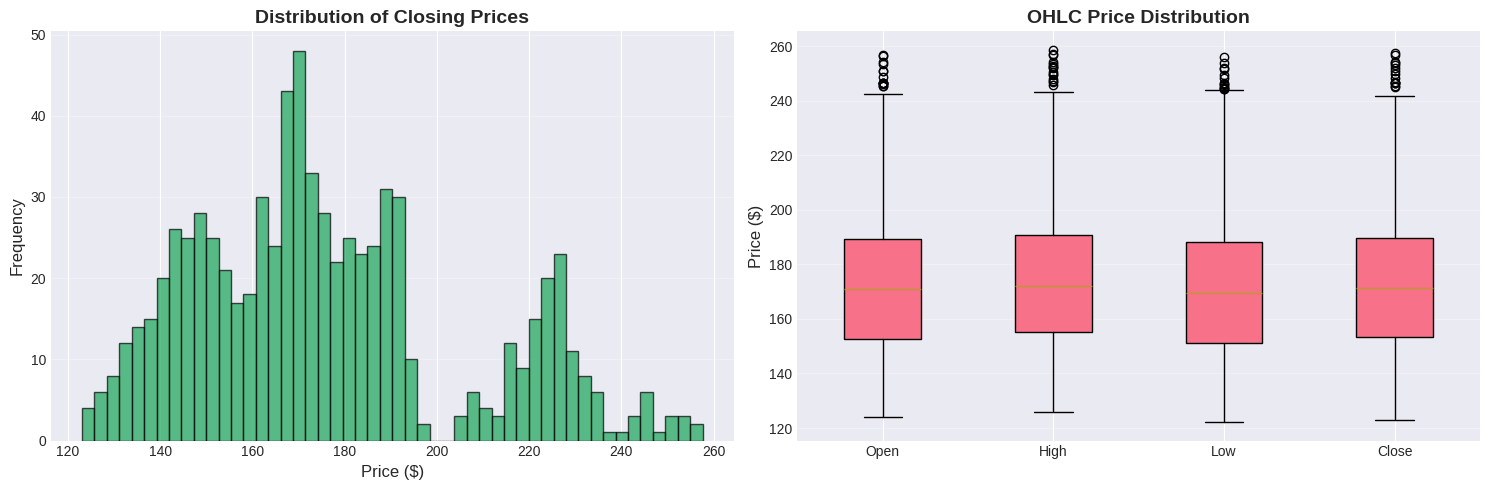

In [17]:
# Plot 3: Price Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(df['Close'], bins=50, color='#18A558', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Closing Prices', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot
box_data = [df['Open'], df['High'], df['Low'], df['Close']]
axes[1].boxplot(box_data, labels=['Open', 'High', 'Low', 'Close'], patch_artist=True)
axes[1].set_title('OHLC Price Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

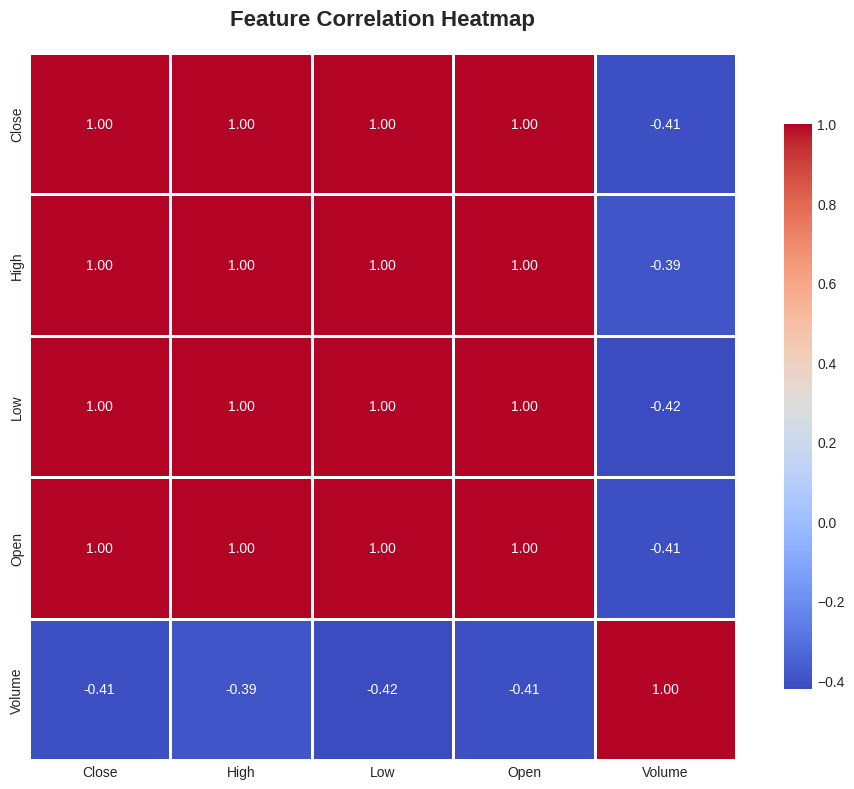


📊 Correlation Analysis:
Close     1.000000
High      0.998641
Low       0.998597
Open      0.996750
Volume   -0.407098
Name: Close, dtype: float64


In [18]:
# Plot 4: Correlation Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)

ax.set_title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Correlation Analysis:")
print("="*60)
print(correlation_matrix['Close'].sort_values(ascending=False))

## 5. Feature Engineering

Create additional features that might help predict the next day's closing price.

In [19]:
# Create a copy of the dataframe for feature engineering
df_features = df.copy()

# 1. Price change features
df_features['Price_Change'] = df_features['Close'] - df_features['Open']
df_features['Price_Change_Pct'] = (df_features['Price_Change'] / df_features['Open']) * 100

# 2. Daily range
df_features['Daily_Range'] = df_features['High'] - df_features['Low']

# 3. Moving averages
df_features['MA_5'] = df_features['Close'].rolling(window=5).mean()
df_features['MA_10'] = df_features['Close'].rolling(window=10).mean()
df_features['MA_20'] = df_features['Close'].rolling(window=20).mean()

# 4. Volatility (standard deviation)
df_features['Volatility_5'] = df_features['Close'].rolling(window=5).std()
df_features['Volatility_10'] = df_features['Close'].rolling(window=10).std()

# 5. Volume change
df_features['Volume_Change'] = df_features['Volume'].pct_change()

# 6. Previous day's close (lag feature)
df_features['Prev_Close'] = df_features['Close'].shift(1)

# 7. Target: Next day's close
df_features['Next_Close'] = df_features['Close'].shift(-1)

# Display new features
print("✅ Feature Engineering Complete!")
print(f"\nNew features created: {len(df_features.columns) - len(df.columns)}")
print(f"Total features: {len(df_features.columns)}")
print(f"\nNew columns: {list(df_features.columns[len(df.columns):])}")

✅ Feature Engineering Complete!

New features created: 11
Total features: 16

New columns: ['Price_Change', 'Price_Change_Pct', 'Daily_Range', 'MA_5', 'MA_10', 'MA_20', 'Volatility_5', 'Volatility_10', 'Volume_Change', 'Prev_Close', 'Next_Close']


In [20]:
# Display sample of engineered features
print("\nSample of Engineered Features:")
print("="*60)
df_features[['Close', 'MA_5', 'MA_10', 'MA_20', 'Volatility_5', 'Next_Close']].tail(10)


Sample of Engineered Features:


,Close,MA_5,MA_10,MA_20,Volatility_5,Next_Close
Date,,,,,,
2024-12-16,249.676086,246.929099,244.631650,237.858151,1.664724,252.102844
2024-12-17,252.102844,248.064893,245.708766,239.124236,2.790496,246.702347
2024-12-18,246.702347,248.375201,246.210028,240.107366,2.451052,248.432877
2024-12-19,248.432877,248.739212,246.881360,241.141218,2.250859,253.107361
2024-12-20,253.107361,250.004303,248.040033,242.432664,2.622635,253.883118
2024-12-23,253.883118,250.845709,248.887404,243.695763,3.118915,256.797241
2024-12-24,256.797241,251.784589,249.924741,244.955385,4.133503,257.612732
2024-12-26,257.612732,253.966666,251.170934,246.146875,3.628848,254.201355
2024-12-27,254.201355,255.120361,251.929787,247.174262,1.965410,250.829773


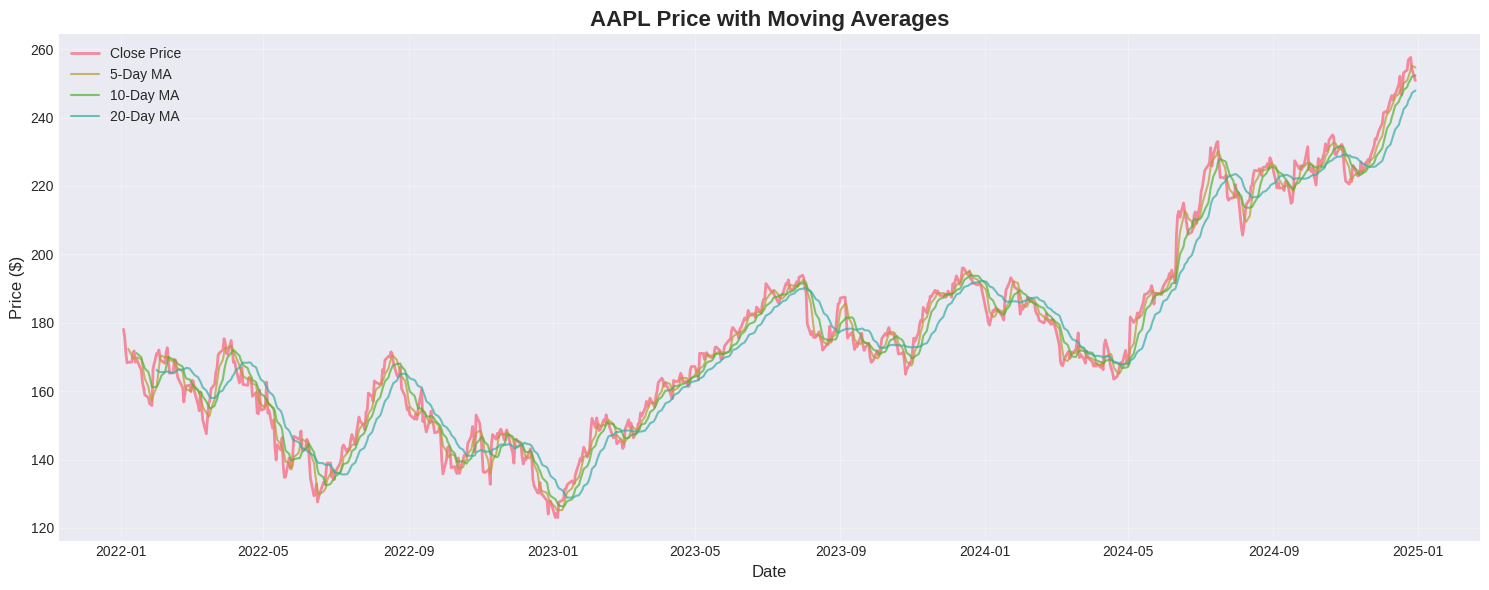

In [21]:
# Plot moving averages
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df_features.index, df_features['Close'], label='Close Price', linewidth=2, alpha=0.8)
ax.plot(df_features.index, df_features['MA_5'], label='5-Day MA', linewidth=1.5, alpha=0.7)
ax.plot(df_features.index, df_features['MA_10'], label='10-Day MA', linewidth=1.5, alpha=0.7)
ax.plot(df_features.index, df_features['MA_20'], label='20-Day MA', linewidth=1.5, alpha=0.7)

ax.set_title(f'{ticker} Price with Moving Averages', fontsize=16, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Price ($)', fontsize=12)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Data Preparation for Machine Learning

In [22]:
# Remove rows with NaN values (created by rolling windows and shift operations)
df_ml = df_features.dropna()

print(f"Original dataset: {len(df_features)} rows")
print(f"After removing NaN: {len(df_ml)} rows")
print(f"Rows removed: {len(df_features) - len(df_ml)}")

Original dataset: 752 rows
After removing NaN: 732 rows
Rows removed: 20


In [23]:
# Define features and target
feature_columns = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Daily_Range',
                   'MA_5', 'MA_10', 'MA_20', 'Volatility_5', 'Volatility_10',
                   'Volume_Change', 'Prev_Close']

X = df_ml[feature_columns]
y = df_ml['Next_Close']

print("Features (X):")
print(f"  Shape: {X.shape}")
print(f"  Columns: {list(X.columns)}")
print(f"\nTarget (y):")
print(f"  Shape: {y.shape}")
print(f"  Name: Next_Close (Next day's closing price)")

Features (X):
  Shape: (732, 13)
  Columns: ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Daily_Range', 'MA_5', 'MA_10', 'MA_20', 'Volatility_5', 'Volatility_10', 'Volume_Change', 'Prev_Close']

Target (y):
  Shape: (732,)
  Name: Next_Close (Next day's closing price)


In [24]:
# Split data into training and testing sets (80-20 split)
# For time series, we use the most recent data for testing
split_index = int(len(df_ml) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print("\n" + "="*60)
print("TRAIN-TEST SPLIT")
print("="*60)
print(f"Training set: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing set:  {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")
print(f"\nTraining period: {X_train.index[0].date()} to {X_train.index[-1].date()}")
print(f"Testing period:  {X_test.index[0].date()} to {X_test.index[-1].date()}")


TRAIN-TEST SPLIT
Training set: 585 samples (79.9%)
Testing set:  147 samples (20.1%)

Training period: 2022-01-31 to 2024-05-29
Testing period:  2024-05-30 to 2024-12-27


In [25]:
# Feature scaling (important for Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling complete!")
print(f"\nOriginal feature range (example - 'Open'):")
print(f"  Min: ${X_train['Open'].min():.2f}")
print(f"  Max: ${X_train['Open'].max():.2f}")
print(f"\nScaled feature range:")
print(f"  Min: {X_train_scaled[:, 0].min():.2f}")
print(f"  Max: {X_train_scaled[:, 0].max():.2f}")

✅ Feature scaling complete!

Original feature range (example - 'Open'):
  Min: $124.02
  Max: $195.98

Scaled feature range:
  Min: -2.21
  Max: 1.78


## 7. Model Training

We'll train two models:
1. **Linear Regression** - Simple and interpretable
2. **Random Forest Regressor** - More complex, can capture non-linear patterns

### 7.1 Linear Regression Model

In [26]:
# Train Linear Regression model
print("Training Linear Regression Model...")
print("="*60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("✅ Linear Regression model trained!")
print(f"\nModel Coefficients (first 5): {lr_model.coef_[:5]}")
print(f"Model Intercept: {lr_model.intercept_:.2f}")

Training Linear Regression Model...
✅ Linear Regression model trained!

Model Coefficients (first 5): [11.58166472  2.49405411  2.4411465  -0.01200587  1.92981513]
Model Intercept: 164.03


In [27]:
# Make predictions with Linear Regression
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

print("✅ Predictions generated!")
print(f"\nSample predictions (first 5 test samples):")
print("="*60)
comparison_lr = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_lr[:5],
    'Difference': y_test.values[:5] - y_test_pred_lr[:5]
})
print(comparison_lr)

✅ Predictions generated!

Sample predictions (first 5 test samples):
       Actual   Predicted  Difference
0  190.774551  189.591193    1.183359
1  192.540894  190.078348    2.462545
2  192.858414  192.318606    0.539808
3  194.366760  192.387317    1.979444
4  192.987427  194.156811   -1.169384


### 7.2 Random Forest Regressor Model

In [28]:
# Train Random Forest model
print("Training Random Forest Model...")
print("="*60)

rf_model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    random_state=42,       # For reproducibility
    n_jobs=-1              # Use all CPU cores
)

rf_model.fit(X_train, y_train)  # Random Forest doesn't require scaling

print("✅ Random Forest model trained!")
print(f"\nNumber of trees: {rf_model.n_estimators}")
print(f"Maximum depth: {rf_model.max_depth}")

Training Random Forest Model...
✅ Random Forest model trained!

Number of trees: 100
Maximum depth: 10


In [29]:
# Make predictions with Random Forest
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

print("✅ Predictions generated!")
print(f"\nSample predictions (first 5 test samples):")
print("="*60)
comparison_rf = pd.DataFrame({
    'Actual': y_test.values[:5],
    'Predicted': y_test_pred_rf[:5],
    'Difference': y_test.values[:5] - y_test_pred_rf[:5]
})
print(comparison_rf)

✅ Predictions generated!

Sample predictions (first 5 test samples):
       Actual   Predicted  Difference
0  190.774551  189.913470    0.861082
1  192.540894  189.504686    3.036208
2  192.858414  192.328382    0.530031
3  194.366760  192.039981    2.326779
4  192.987427  192.760350    0.227077


## 8. Model Evaluation

We'll evaluate both models using several metrics:
- **RMSE** (Root Mean Squared Error) - Lower is better
- **MAE** (Mean Absolute Error) - Average prediction error
- **R² Score** - Proportion of variance explained (closer to 1 is better)

In [31]:
def evaluate_model(y_true, y_pred, model_name, dataset_name):
    """
    Calculate and display evaluation metrics.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f"\n{model_name} - {dataset_name} Set")
    print("="*60)
    print(f"RMSE (Root Mean Squared Error): ${rmse:.2f}")
    print(f"MAE (Mean Absolute Error):      ${mae:.2f}")
    print(f"R² Score:                        {r2:.4f}")
    print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")

    return {'RMSE': rmse, 'MAE': mae, 'R2': r2, 'MAPE': mape}

In [32]:
# Evaluate Linear Regression
print("\n" + "="*60)
print("LINEAR REGRESSION EVALUATION")
print("="*60)

lr_train_metrics = evaluate_model(y_train, y_train_pred_lr, "Linear Regression", "Training")
lr_test_metrics = evaluate_model(y_test, y_test_pred_lr, "Linear Regression", "Testing")


LINEAR REGRESSION EVALUATION

Linear Regression - Training Set
RMSE (Root Mean Squared Error): $2.70
MAE (Mean Absolute Error):      $2.05
R² Score:                        0.9775
MAPE (Mean Absolute % Error):    1.29%

Linear Regression - Testing Set
RMSE (Root Mean Squared Error): $3.37
MAE (Mean Absolute Error):      $2.64
R² Score:                        0.9335
MAPE (Mean Absolute % Error):    1.18%


In [33]:
# Evaluate Random Forest
print("\n" + "="*60)
print("RANDOM FOREST EVALUATION")
print("="*60)

rf_train_metrics = evaluate_model(y_train, y_train_pred_rf, "Random Forest", "Training")
rf_test_metrics = evaluate_model(y_test, y_test_pred_rf, "Random Forest", "Testing")


RANDOM FOREST EVALUATION

Random Forest - Training Set
RMSE (Root Mean Squared Error): $1.34
MAE (Mean Absolute Error):      $1.00
R² Score:                        0.9945
MAPE (Mean Absolute % Error):    0.63%

Random Forest - Testing Set
RMSE (Root Mean Squared Error): $33.93
MAE (Mean Absolute Error):      $31.40
R² Score:                        -5.7386
MAPE (Mean Absolute % Error):    13.69%


In [34]:
# Model Comparison
print("\n" + "="*60)
print("MODEL COMPARISON (Test Set)")
print("="*60)

comparison_df = pd.DataFrame({
    'Linear Regression': lr_test_metrics,
    'Random Forest': rf_test_metrics
})

print(comparison_df)

# Determine best model
if lr_test_metrics['RMSE'] < rf_test_metrics['RMSE']:
    print("\n🏆 Best Model: Linear Regression (Lower RMSE)")
else:
    print("\n🏆 Best Model: Random Forest (Lower RMSE)")


MODEL COMPARISON (Test Set)
      Linear Regression  Random Forest
RMSE           3.369849      33.929822
MAE            2.637773      31.396276
R2             0.933530      -5.738622
MAPE           1.180650      13.690334

🏆 Best Model: Linear Regression (Lower RMSE)


## 9. Visualize Predictions

Let's visualize how well our models predict the actual stock prices.

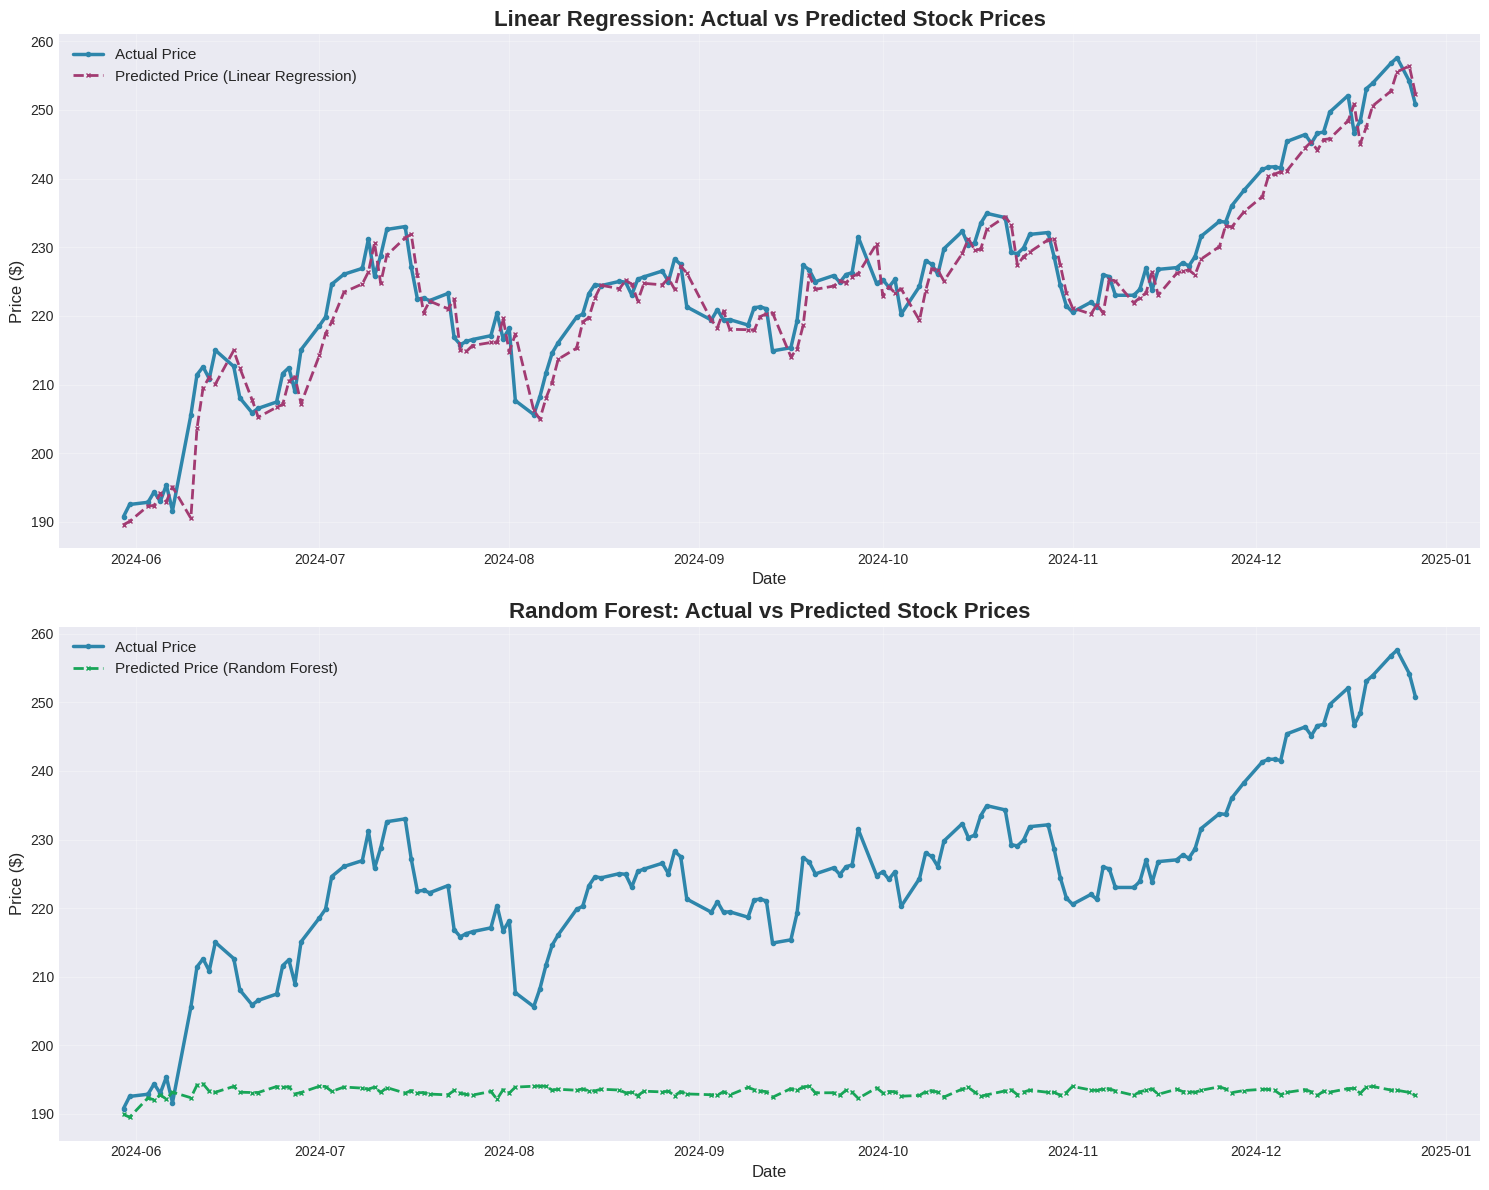

In [35]:
# Plot 1: Actual vs Predicted (Linear Regression)
fig, axes = plt.subplots(2, 1, figsize=(15, 12))

# Linear Regression
axes[0].plot(y_test.index, y_test.values, label='Actual Price',
             linewidth=2.5, color='#2E86AB', marker='o', markersize=3)
axes[0].plot(y_test.index, y_test_pred_lr, label='Predicted Price (Linear Regression)',
             linewidth=2, color='#A23B72', linestyle='--', marker='x', markersize=3)
axes[0].set_title('Linear Regression: Actual vs Predicted Stock Prices',
                  fontsize=16, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Price ($)', fontsize=12)
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].plot(y_test.index, y_test.values, label='Actual Price',
             linewidth=2.5, color='#2E86AB', marker='o', markersize=3)
axes[1].plot(y_test.index, y_test_pred_rf, label='Predicted Price (Random Forest)',
             linewidth=2, color='#18A558', linestyle='--', marker='x', markersize=3)
axes[1].set_title('Random Forest: Actual vs Predicted Stock Prices',
                  fontsize=16, fontweight='bold')
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Price ($)', fontsize=12)
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

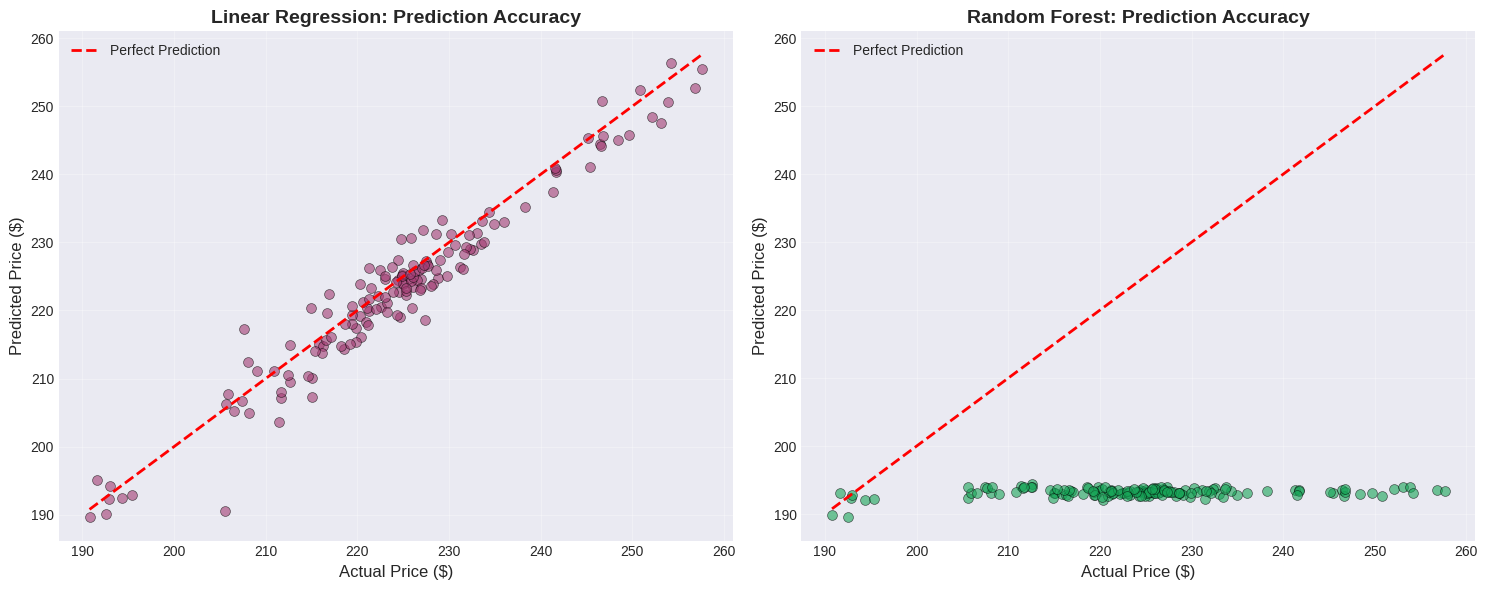

In [36]:
# Plot 2: Scatter plots - Actual vs Predicted
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression scatter
axes[0].scatter(y_test, y_test_pred_lr, alpha=0.6, color='#A23B72', s=50, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_title('Linear Regression: Prediction Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Random Forest scatter
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.6, color='#18A558', s=50, edgecolors='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[1].set_title('Random Forest: Prediction Accuracy', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Actual Price ($)', fontsize=12)
axes[1].set_ylabel('Predicted Price ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

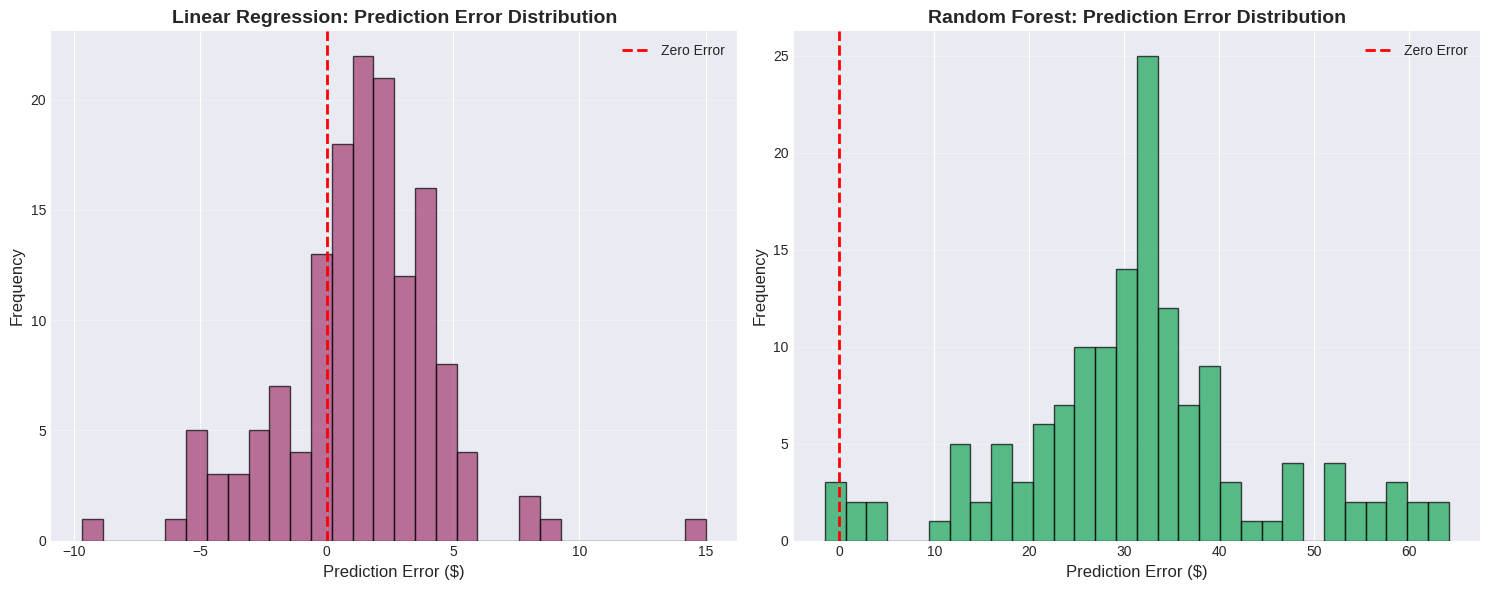

Linear Regression - Mean Error: $1.30
Random Forest - Mean Error: $31.38


In [37]:
# Plot 3: Prediction Errors
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Linear Regression errors
lr_errors = y_test.values - y_test_pred_lr
axes[0].hist(lr_errors, bins=30, color='#A23B72', alpha=0.7, edgecolor='black')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0].set_title('Linear Regression: Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Prediction Error ($)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Random Forest errors
rf_errors = y_test.values - y_test_pred_rf
axes[1].hist(rf_errors, bins=30, color='#18A558', alpha=0.7, edgecolor='black')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_title('Random Forest: Prediction Error Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Prediction Error ($)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Linear Regression - Mean Error: ${lr_errors.mean():.2f}")
print(f"Random Forest - Mean Error: ${rf_errors.mean():.2f}")

## 10. Feature Importance Analysis (Random Forest Only)

In [38]:
# Get feature importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\n" + "="*60)
print("FEATURE IMPORTANCE (Random Forest)")
print("="*60)
print(feature_importance.to_string(index=False))


FEATURE IMPORTANCE (Random Forest)
      Feature  Importance
          Low    0.883864
         High    0.092855
 Price_Change    0.004439
   Prev_Close    0.003325
         Open    0.003286
         MA_5    0.002098
Volume_Change    0.002037
        MA_20    0.001508
Volatility_10    0.001414
 Volatility_5    0.001383
  Daily_Range    0.001328
       Volume    0.001277
        MA_10    0.001186


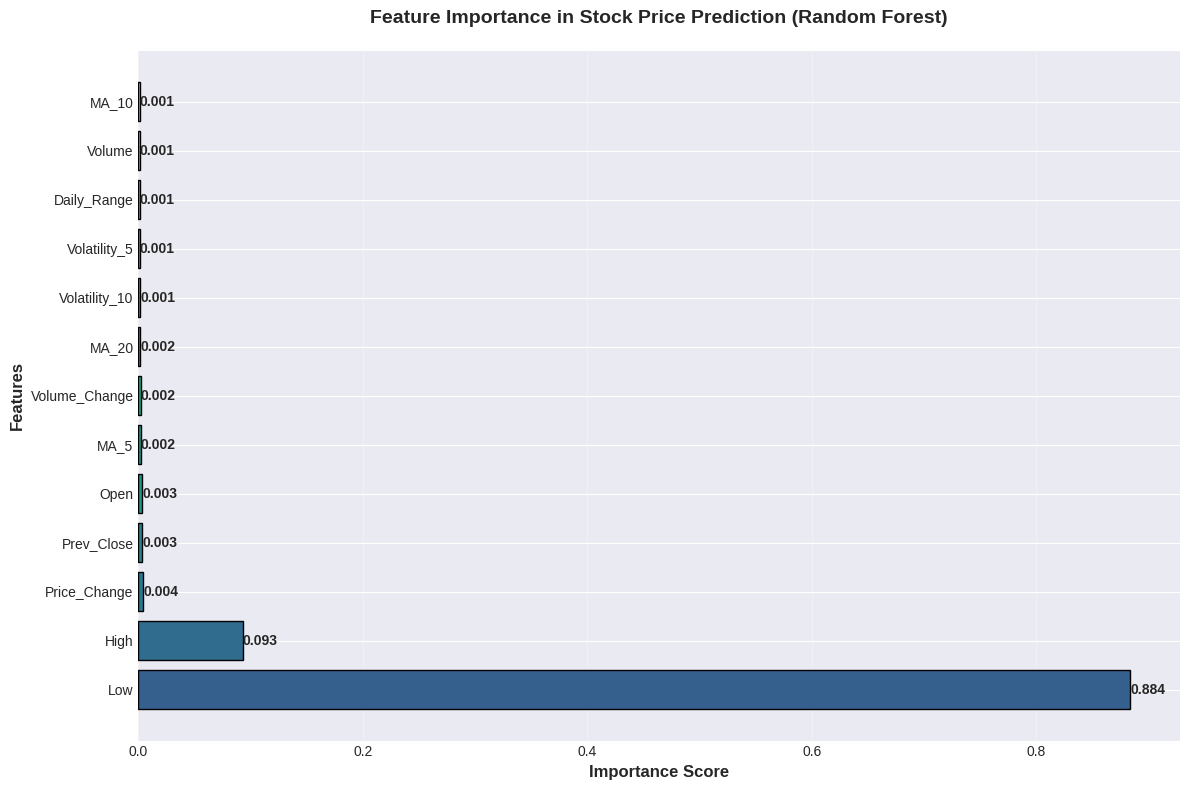

In [39]:
# Visualize feature importance
fig, ax = plt.subplots(figsize=(12, 8))

colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_importance)))
bars = ax.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, edgecolor='black')

ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance in Stock Price Prediction (Random Forest)',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            ha='left', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

## 11. Making Future Predictions

Use the most recent data to predict the next day's closing price.

In [40]:
# Get the most recent data point for prediction
latest_data = X.iloc[-1:]
latest_data_scaled = scaler.transform(latest_data)

# Make predictions with both models
next_day_pred_lr = lr_model.predict(latest_data_scaled)[0]
next_day_pred_rf = rf_model.predict(latest_data)[0]

current_price = df['Close'].iloc[-1]
latest_date = df.index[-1].date()

print("\n" + "="*60)
print("NEXT DAY PRICE PREDICTION")
print("="*60)
print(f"\nCurrent Date: {latest_date}")
print(f"Current Closing Price: ${current_price:.2f}")
print(f"\nPredicted Next Day Close (Linear Regression): ${next_day_pred_lr:.2f}")
print(f"  → Change: ${next_day_pred_lr - current_price:+.2f} ({(next_day_pred_lr - current_price)/current_price*100:+.2f}%)")
print(f"\nPredicted Next Day Close (Random Forest): ${next_day_pred_rf:.2f}")
print(f"  → Change: ${next_day_pred_rf - current_price:+.2f} ({(next_day_pred_rf - current_price)/current_price*100:+.2f}%)")
print("\n" + "="*60)


NEXT DAY PRICE PREDICTION

Current Date: 2024-12-30
Current Closing Price: $250.83

Predicted Next Day Close (Linear Regression): $252.37
  → Change: $+1.54 (+0.62%)

Predicted Next Day Close (Random Forest): $192.68
  → Change: $-58.15 (-23.18%)



## 12. Summary and Key Findings

In [41]:
print("\n" + "="*60)
print("PROJECT SUMMARY")
print("="*60)

print(f"\n📊 Dataset: {ticker}")
print(f"   Total records: {len(df)}")
print(f"   Date range: {df.index[0].date()} to {df.index[-1].date()}")

print(f"\n🔧 Feature Engineering:")
print(f"   Original features: {len(df.columns)}")
print(f"   Engineered features: {len(feature_columns)}")
print(f"   Key features: Moving Averages, Volatility, Price Changes")

print(f"\n🤖 Models Trained:")
print(f"   1. Linear Regression")
print(f"      - Test RMSE: ${lr_test_metrics['RMSE']:.2f}")
print(f"      - Test R²: {lr_test_metrics['R2']:.4f}")
print(f"   2. Random Forest Regressor")
print(f"      - Test RMSE: ${rf_test_metrics['RMSE']:.2f}")
print(f"      - Test R²: {rf_test_metrics['R2']:.4f}")

print(f"\n🏆 Best Model: {'Linear Regression' if lr_test_metrics['RMSE'] < rf_test_metrics['RMSE'] else 'Random Forest'}")

print(f"\n💡 Key Insights:")
print(f"   - Most important features: {', '.join(feature_importance['Feature'].head(3).values)}")
print(f"   - Average prediction error: ${min(lr_test_metrics['MAE'], rf_test_metrics['MAE']):.2f}")
print(f"   - Models can explain ~{max(lr_test_metrics['R2'], rf_test_metrics['R2'])*100:.1f}% of price variance")

print("\n" + "="*60)
print("✅ TASK COMPLETED SUCCESSFULLY!")
print("="*60)


PROJECT SUMMARY

📊 Dataset: AAPL
   Total records: 752
   Date range: 2022-01-03 to 2024-12-30

🔧 Feature Engineering:
   Original features: 5
   Engineered features: 13
   Key features: Moving Averages, Volatility, Price Changes

🤖 Models Trained:
   1. Linear Regression
      - Test RMSE: $3.37
      - Test R²: 0.9335
   2. Random Forest Regressor
      - Test RMSE: $33.93
      - Test R²: -5.7386

🏆 Best Model: Linear Regression

💡 Key Insights:
   - Most important features: Low, High, Price_Change
   - Average prediction error: $2.64
   - Models can explain ~93.4% of price variance

✅ TASK COMPLETED SUCCESSFULLY!


## 13. Conclusion

### What We Learned:

1. **Data Collection**: Successfully loaded stock market data using yfinance (or generated realistic sample data)

2. **Feature Engineering**: Created meaningful features like moving averages, volatility measures, and price changes that help predict future prices

3. **Model Comparison**:
   - Linear Regression provides interpretable results and works well for linear relationships
   - Random Forest can capture non-linear patterns and generally performs better on complex stock data

4. **Evaluation**: Used multiple metrics (RMSE, MAE, R²) to thoroughly assess model performance

5. **Feature Importance**: Identified which factors most influence stock price predictions

### Limitations:

- Stock prices are influenced by many external factors (news, market sentiment, global events) not captured in historical price data
- Past performance doesn't guarantee future results
- Short-term predictions are more reliable than long-term forecasts

### Future Improvements:

- Include sentiment analysis from news and social media
- Add macroeconomic indicators (interest rates, inflation)
- Try advanced models (LSTM, GRU for time series)
- Implement ensemble methods combining multiple models

---

**Note**: This project is for educational purposes only. Never use these predictions for actual trading decisions without consulting financial professionals.